# Lesson 7 - Sentiment Analysis

This assignment requires that you build a sentiment analysis classifier for a series of tweets.
The data consists of a file "twitter_data.csv". The file contains 16,000 tweets with their respective score. The attributes are the sentences, and the score is either 4 (for positive) or 0 (for negative).

In [1]:
# !pip install --user wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
#Imports
import csv
import string
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from nltk.corpus import stopwords
from scipy.sparse import coo_matrix
from scipy.stats import uniform
from collections import Counter
import argparse
import pprint
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/standard/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/standard/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/standard/nltk_data...


True

In [3]:
#Read files
url = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/twitter_data.csv"
df = pd.read_csv(url, sep=",")
df.columns = ["sentiment_label","tweet_text"]
    
print(df.head())

   sentiment_label                                         tweet_text
0                4  @elephantbird Hey dear, Happy Friday to You  A...
1                4  Ughhh layin downnnn    Waiting for zeina to co...
2                0  @greeniebach I reckon he'll play, even if he's...
3                0              @vaLewee I know!  Saw it on the news!
4                0  very sad that http://www.fabchannel.com/ has c...


In [7]:
# df['sentiment_label'].unique()
# df.info()
df.describe()

,sentiment_label
count,160000.000000
mean,2.000000
std,2.000006
min,0.000000
25%,0.000000
50%,2.000000
75%,4.000000
max,4.000000


Question 1: Generate word cloud for positive sentiment.

In [10]:
def preprocess(text, list_of_steps):
    for step in list_of_steps:
        if step == 'remove_non_ascii':
            text = ''.join([x for x in text if ord(x) < 128])
        elif step == 'lowercase':
            text = text.lower()
        elif step == 'remove_punctuation':
            punct_exclude = set(string.punctuation)
            text = ''.join(char for char in text if char not in punct_exclude)
        elif step == 'remove_numbers':
            text = re.sub("\d+", "", text)
        elif step == 'remove_stopwords':
            stops = stopwords.words('english')
            word_list = text.split(' ')
            text_words = [word for word in word_list if word not in stops]
            text = ' '.join(text_words)
        elif step == 'stem_words':
            lmtzr = WordNetLemmatizer()
            word_list = text.split(' ')
            stemmed_words = [lmtzr.lemmatize(word) for word in word_list]
            text = ' '.join(stemmed_words)
        elif step == 'strip_whitespace':
            text = ' '.join(text.split())
    return text

steps = ['remove_non_ascii', 'lowercase', 'remove_punctuation', 'remove_numbers',
            'strip_whitespace', 'remove_stopwords', 'stem_words']

df['clean_tweet']=df['tweet_text'].apply(lambda s: preprocess(s, steps))
pos_clean_string=','.join(df.loc[df['sentiment_label']==4, :]['clean_tweet'])
wordcloud=WordCloud(max_words=50,width=2500,height=1500,background_color='black',stopwords=STOPWORDS).generate(pos_clean_string)

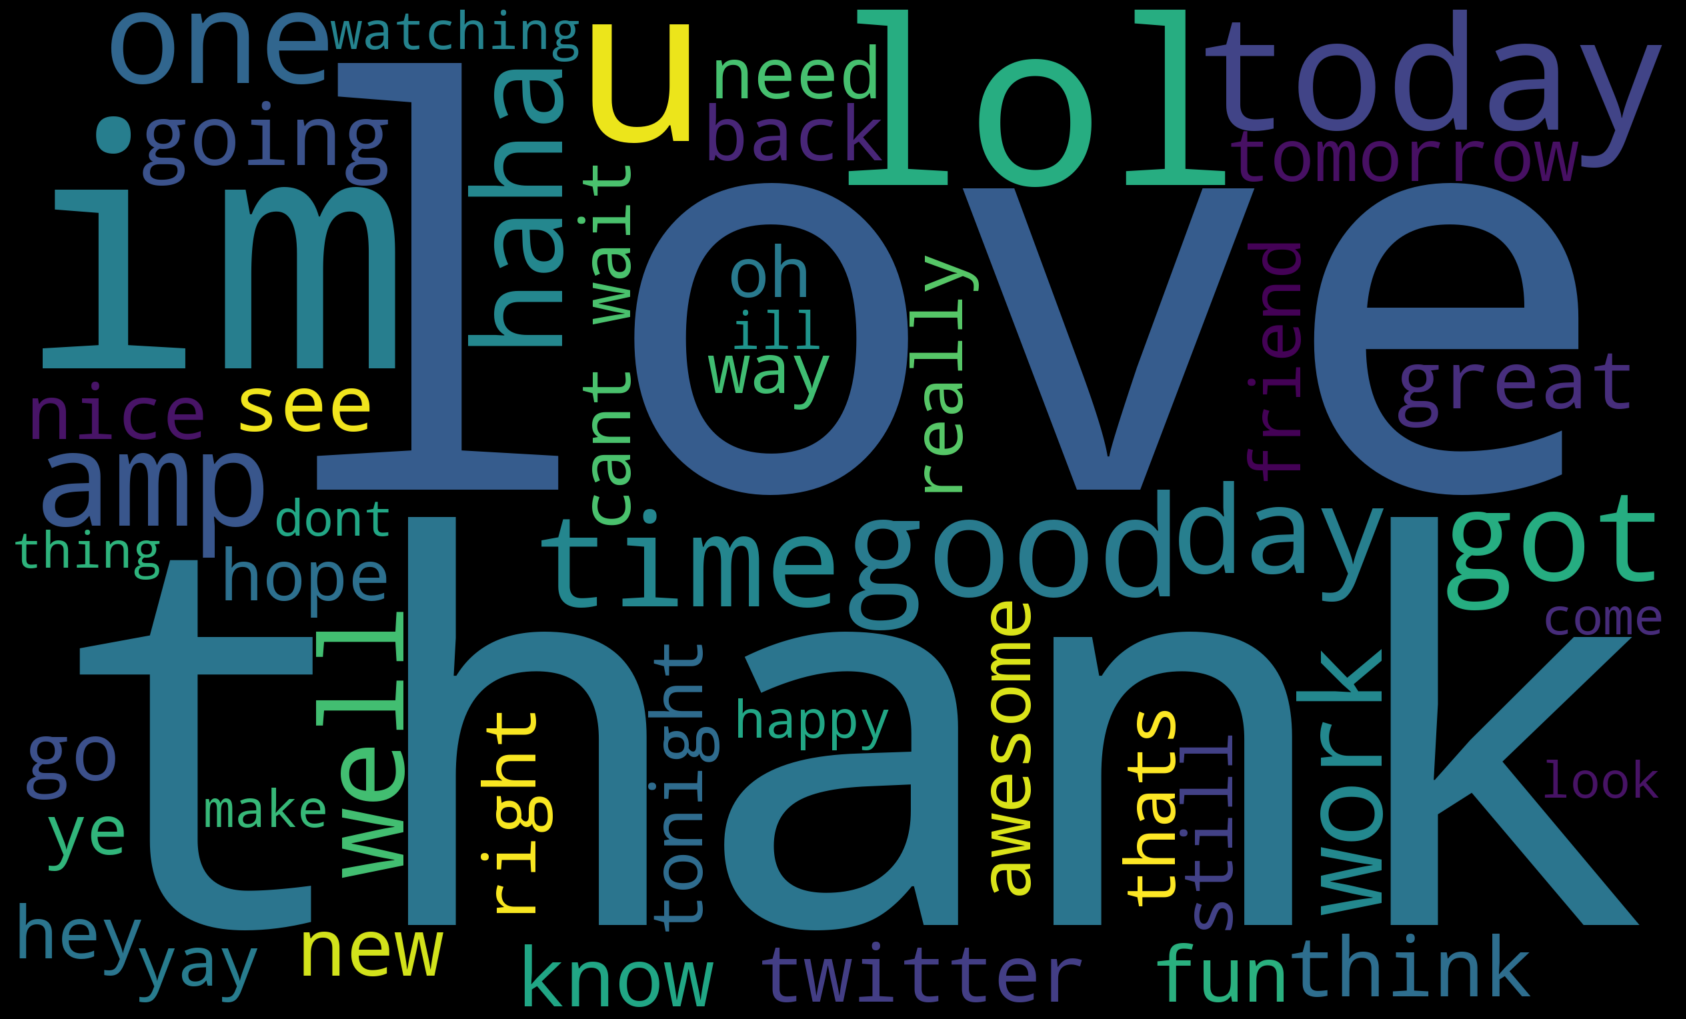

In [12]:
#plot wordcloud object
fig = plt.figure(figsize = (20, 10),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Question 2: Generate word cloud for negative sentiment.

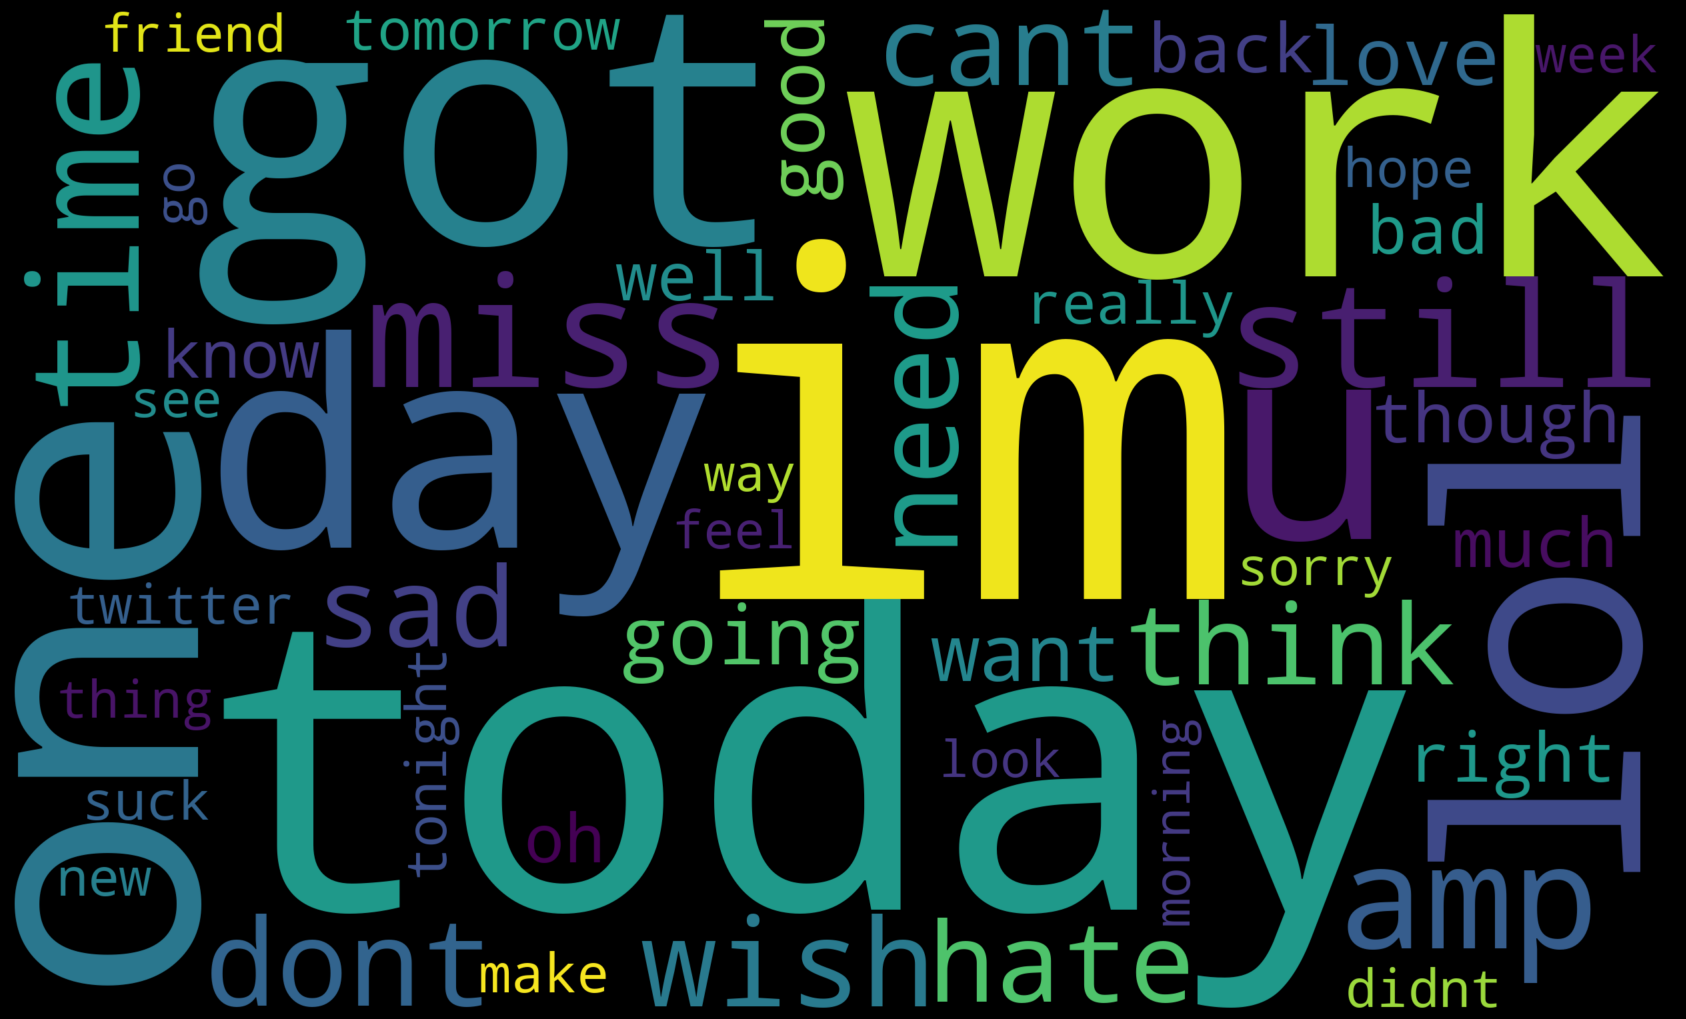

In [13]:
# join entire clean_tweet column
neg_clean_string = ','.join(df.loc[df['sentiment_label'] == 0, :]['clean_tweet'])
# create wordcloud object
wordcloud = WordCloud(max_words=50,width = 2500,height = 1500,background_color = 'black',stopwords = STOPWORDS).generate(neg_clean_string)
# plot wordcloud object
fig = plt.figure(figsize = (20, 10),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Question 3: Split data where test size = 40000, random_state = 42. Max_df=0.5, max_features = 6228,

In [15]:
# Declare the TFIDF vectorizer.
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, max_features=6228, stop_words='english')
# Fit the vectorizer over the dataset
clean_texts = df['clean_tweet']
tf_idf_tweets = vectorizer.fit_transform(clean_texts)
# split the data
y_targets = np.array(df['sentiment_label'])
X_train, X_test, y_train, y_test = train_test_split(tf_idf_tweets, y_targets, test_size = 40000, random_state = 42)

Question 4: Build a classifier that classifies the sentiment of a sentence. Criteria - loss = modified_huber, learning_rate = adaptive, peanlty = elasticnet, set an alpha and eta as well.

In [23]:
model = SGDClassifier(loss='modified_huber', learning_rate='adaptive', penalty='elasticnet', alpha=0.0001, eta0=0.001)
model.fit(X_train, y_train)

SGDClassifier(eta0=0.0001, learning_rate='adaptive', loss='modified_huber',
              penalty='elasticnet')

Question 5: What is the accuracy of your model when applied to testing data?

In [28]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

predicted = model.predict(X_test)
score = accuracy_score(y_test, predicted)
print("Model Score:", score)

Model Score: 0.745225


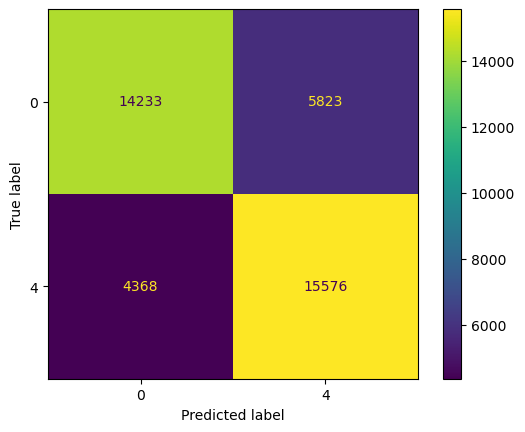

Precision: [0.76517392 0.72788448]
Recall   : [0.70966294 0.78098676]
F1       : [0.73637375 0.7535012 ]


In [29]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, predicted)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()
print('Precision:', precision)
print('Recall   :', recall)
print('F1       :', f1)

Question 6: What conclusions can you draw from the model?

Our model appears to perform decently, but not great and is better at predicting negative sentiment than it does positive sentiment. Our model could be better at predicting positive sentiment
because it more often predict positive sentiment than negative.

[Bonus] Question 7: If you are to build a sentiment analysis model, would it be dependent on the source of data?

Yes. For any model, it's performanc is dependent on quality and quantity of data. Looking at the word cloud and given that the source of data is Twitter, I can see friend, love, tonight to name a few classified under negative corpus which in my experience need not necessarily be and vice versa for the positive corpus. Tweet representation in the model also matters; we have removed stop words here and used TF-IDF which might not have represented the tweets well for the model to use and draw conclusions from. Word embeddings might do a better job here since it might do a better job identifying sarcasm, excitement etc. Lastly, decision tree models might also work well here instead of SGD.

Question 8: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.

Incoming experience: No incoming experience apart from previous assignments.

Steps taken: This week's lesson was about NLP. Got a feel for text is cleaned and featurized for ML models.

Obstacles: None.

Link to real world: Helped me understand the different libraries used for text cleaning and processing. 

Steps missing (with just this week's learning): Scaling, model evaluation and finding the appropriate number of clusters through elbow method.